<a href="https://colab.research.google.com/github/Maddi007-Py/Maddi007-Py-CrimeAnalytics_Clustering/blob/main/Code%20Sections/5.4%20Data%20Reduction%20and%20Projection%20-%20e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **5.4 Data Reduction and Projection - e) EDA**

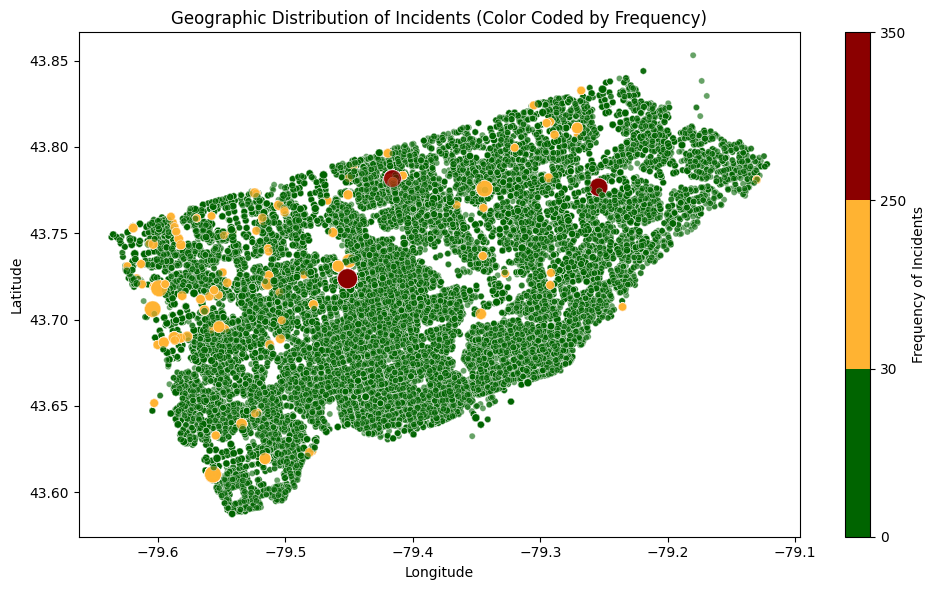


===== Top 10 Most Frequent Incident Locations =====

Geo_Location
-79.4513062, 43.7236571    346
-79.2542411, 43.7766363    290
-79.4159903, 43.781633     265
-79.5991709, 43.7180963    237
-79.5569096, 43.6101506    236
-79.3437465, 43.7758819    228
-79.6042074, 43.7060265    226
-79.4501051, 43.733978     150
-79.5141279, 43.7206421    105
-79.4586396, 43.7309251    100

===== Correlation Matrix =====
                       OCC_YEAR   OCC_DAY   OCC_DOY  OCC_HOUR  LONG_WGS84  \
OCC_YEAR               1.000000  0.000366 -0.041942 -0.050614    0.073160   
OCC_DAY                0.000366  1.000000  0.076077 -0.005412   -0.001582   
OCC_DOY               -0.041942  0.076077  1.000000 -0.001693    0.003060   
OCC_HOUR              -0.050614 -0.005412 -0.001693  1.000000   -0.002338   
LONG_WGS84             0.073160 -0.001582  0.003060 -0.002338    1.000000   
LAT_WGS84              0.037494  0.003682 -0.005110 -0.016461    0.422169   
reporting_delay_hours -0.041679  0.005773  0.018454 

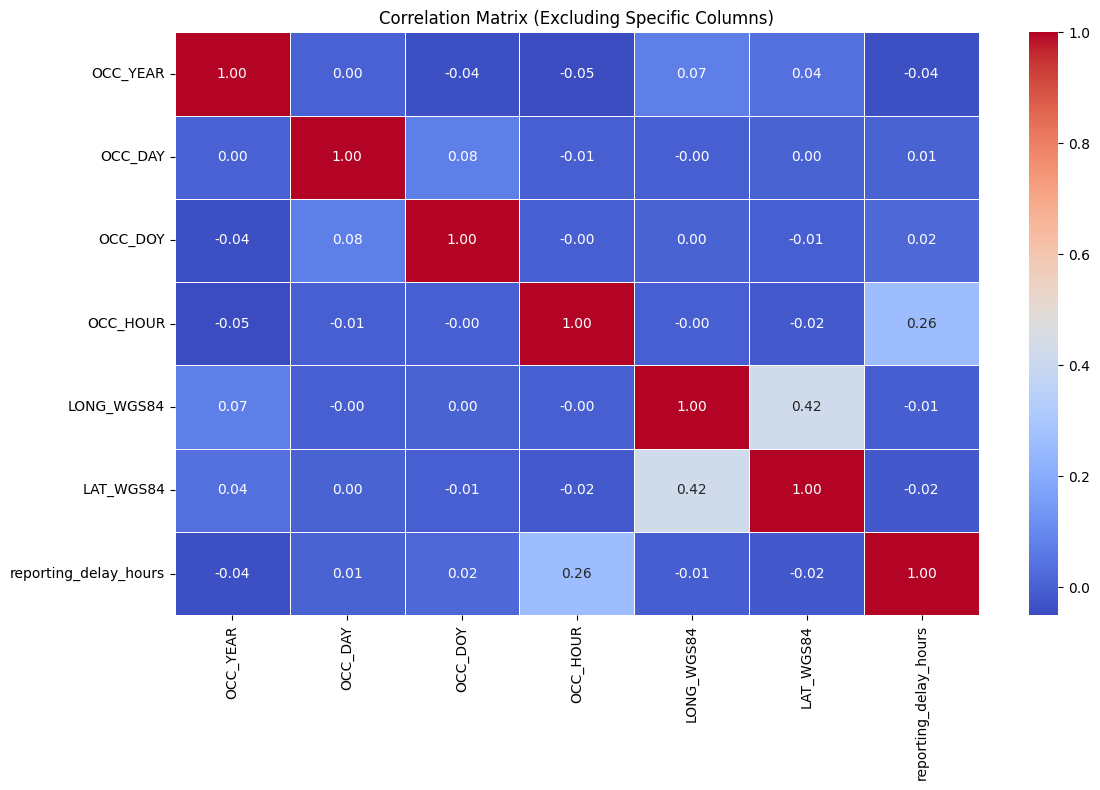


===== Outlier Summary =====
OCC_YEAR: 0 outliers (0.00%)
OCC_DAY: 0 outliers (0.00%)
OCC_DOY: 0 outliers (0.00%)
OCC_HOUR: 0 outliers (0.00%)
LONG_WGS84: 0 outliers (0.00%)
LAT_WGS84: 0 outliers (0.00%)
reporting_delay_hours: 0 outliers (0.00%)


In [ ]:
import numpy as np
import warnings
import pandas as pd
from IPython.display import display, HTML
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap

print("\n\n")
# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read the data from CSV file
url = "https://raw.githubusercontent.com/Maddi007-Py/Maddi007-Py-CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
df = pd.read_csv(url, low_memory=False)

# Calculate the frequency of incidents at each location (rounded to 4 decimal places)
df['Geo_Location'] = df['LONG_WGS84'].round(7).astype(str) + ", " + df['LAT_WGS84'].round(7).astype(str)
location_counts = df['Geo_Location'].value_counts()

# Map frequencies back to the original dataset for color assignment
df['Location_Frequency'] = df['Geo_Location'].map(location_counts)

# Define custom boundaries for the color mapping
boundaries = [0, 30, 250, 350]
colors = ['#006400', '#FFFF00', '#FF6666', '#8B0000']  # Green -> Yellow -> Light Red -> Dark Red
cmap = LinearSegmentedColormap.from_list("custom_green_yellow_red", colors, N=256)
norm = BoundaryNorm(boundaries, cmap.N)

# Scatter plot with color based on location frequency
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis
scatter = sns.scatterplot(x='LONG_WGS84', y='LAT_WGS84', data=df, hue='Location_Frequency', palette=cmap,
                          size='Location_Frequency', sizes=(20, 200), alpha=0.6, legend=None,
                          hue_norm=norm, ax=ax)
ax.set_title("Geographic Distribution of Incidents (Color Coded by Frequency)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Create a colorbar with the custom colormap and boundaries
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for the mappable to allow colorbar creation
fig.colorbar(sm, ax=ax, label="Frequency of Incidents")  # Attach colorbar to the figure and axis

plt.tight_layout()
plt.show()

# Top 10 most frequent locations (rounded to 4 decimal places)
print("\n===== Top 10 Most Frequent Incident Locations =====\n")
print(location_counts.head(10).to_string())
print("="*40)

# Reading from the Processed Data "Final_Data.csv"
df = pd.read_csv(url)

# Drop unwanted columns
df_cleaned = df.drop(columns=['_id', 'EVENT_UNIQUE_ID', 'reporting_delay_days', 'HOOD_158'])

# Convert 'OCC_MONTH' and 'OCC_DOW' to categorical variables, treating them as categories
df_cleaned['OCC_MONTH'] = pd.Categorical(df_cleaned['OCC_MONTH'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'], ordered=False)

df_cleaned['OCC_DOW'] = pd.Categorical(df_cleaned['OCC_DOW'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=False)

# Now we will only select numerical columns to compute the correlation matrix
df_numerical = df_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Print the textual correlation matrix
print("\n===== Correlation Matrix =====")
print(correlation_matrix)
print("="*40)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Correlation Matrix (Excluding Specific Columns)")
plt.tight_layout()
plt.show()

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, HTML

# Load the current dataset from Final_Data.csv
df = pd.read_csv(url, low_memory=False)

# Drop unwanted columns (from previous code)
df_cleaned = df.drop(columns=['_id', 'EVENT_UNIQUE_ID', 'reporting_delay_days', 'HOOD_158'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Function to detect outliers, generate visualizations, and provide textual output for scatter plots
def detect_outliers(df):
    # Select numeric columns from the dataframe
    numeric_df = df.select_dtypes(include='number')

    # Initialize a DataFrame to store outlier information
    outlier_summary = pd.DataFrame(index=numeric_df.columns, columns=['Outlier Count', 'Outlier Percentage'])

    # Calculate outlier summary for each numeric column (using Z-score method with threshold 3)
    for col in numeric_df.columns:
        z_scores = np.abs(stats.zscore(numeric_df[col]))
        outliers = (z_scores > 3)
        outlier_count = outliers.sum()
        outlier_percentage = (outlier_count / len(numeric_df)) * 100
        outlier_summary.loc[col] = [outlier_count, outlier_percentage]

    # Display the outlier summary as text output for easy copy-pasting
    print("\n===== Outlier Summary =====")
    for col in numeric_df.columns:
        outlier_count = outlier_summary.loc[col, 'Outlier Count']
        outlier_percentage = outlier_summary.loc[col, 'Outlier Percentage']
        print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

    # Additional visualizations: Scatter Plots for 2D relationships between numeric columns
    num_cols = len(numeric_df.columns)
    num_plots = (num_cols * (num_cols - 1)) // 2  # Calculate total pairwise scatter plots
    n_rows = num_plots // 3 + (num_plots % 3 > 0)  # Calculate the number of rows needed for the grid

    # Set up the figure for scatter plots
    plt.figure(figsize=(18, 6 * n_rows))
    plot_index = 1

    # List to collect text summaries for each scatter plot
    scatter_texts = []

    for i, col1 in enumerate(numeric_df.columns):
        for j, col2 in enumerate(numeric_df.columns):
            if col1 != col2 and j > i:  # Ensure that each pair is plotted only once
                plt.subplot(n_rows, 3, plot_index)
                sns.scatterplot(data=numeric_df, x=col1, y=col2, alpha=0.6)
                plt.title(f'Scatter Plot: {col1} vs {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)

                # Calculate the Pearson correlation coefficient for this pair
                correlation = numeric_df[col1].corr(numeric_df[col2])
                summary_text = f"Scatter Plot: {col1} vs {col2} | Pearson Correlation: {correlation:.2f}"
                scatter_texts.append(summary_text)
                # Removed the print here to avoid duplicate printing

                plot_index += 1

    plt.tight_layout()
    plt.show()

    # Print a final summary of all scatter plot details (printed only once)
    print("\n===== Scatter Plot Summaries =====")
    for text in scatter_texts:
        print(text)

# Call the function with your cleaned dataframe
detect_outliers(df_cleaned)

print("Outlier detection, visualizations, and correlation calculations completed.")

# Load the dataset
df = pd.read_csv('Final_Data.csv')  # Ensure it's the correct file path

# Check each column's unique values
for column in df.columns:
    print(f"Feature: {column}")
    print(f"Unique Values: {df[column].unique()[:10]}")  # Show the first 10 unique values
    print(f"Total Unique Values: {len(df[column].unique())}")
    print("="*50)

# Ensure columns exist in the DataFrame
if 'LOCATION_TYPE' not in df.columns or 'PREMISES_TYPE' not in df.columns:
    raise ValueError("Columns 'LOCATION_TYPE' or 'PREMISES_TYPE' are missing in the dataset.")

# Group LOCATION_TYPE by each unique PREMISES_TYPE
grouped_data = df.groupby('PREMISES_TYPE')['LOCATION_TYPE'].unique().reset_index()

# Print the results
for index, row in grouped_data.iterrows():
    print(f"PREMISES_TYPE: {row['PREMISES_TYPE']}")
    print("LOCATION_TYPE values:")
    for loc in row['LOCATION_TYPE']:
        print(f"  - {loc}")
    print("-" * 50)  # Separator for readability

# Optional: Save the grouped data to a CSV file
#grouped_data.to_csv("Grouped_Location_Premises.csv", index=False)
print("/n/n")
